<a href="https://www.kaggle.com/code/stutiiikatariaaa/linearregression?scriptVersionId=270031917" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/kaggle/input/solargenerationdataset/solar_power_dataset.xlsx')
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

In [2]:
# Feature engineering
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek

# Select features and target
features = ['temperature', 'Ground_radiation_intensity', 'hour']
X = df[features]
y = df['Photovoltaic_power_generation']

In [3]:
# Split data (time-series split)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only (avoid data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler

# Convert back to DataFrame for readability
X_train = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

In [5]:
model = LinearRegression()

# Fit model on full training data
model.fit(X_train, y_train)

# Cross-validated metrics
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))
cv_mae = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

# Test set evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("=== Test Set Performance ===")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

=== Test Set Performance ===
MSE: 469500.046
RMSE: 685.201
MAE: 527.832
R²: 0.722


In [6]:
# Cross-validation results
print("\n=== Cross-Validation Results ===")
print(f"Mean RMSE: {np.mean(cv_rmse):.3f} (±{np.std(cv_rmse):.3f})")
print(f"Mean MAE: {np.mean(cv_mae):.3f} (±{np.std(cv_mae):.3f})")
print(f"Mean R²: {np.mean(cv_r2):.3f} (±{np.std(cv_r2):.3f})\n")


=== Cross-Validation Results ===
Mean RMSE: 601.639 (±14.395)
Mean MAE: 404.289 (±10.240)
Mean R²: 0.797 (±0.009)



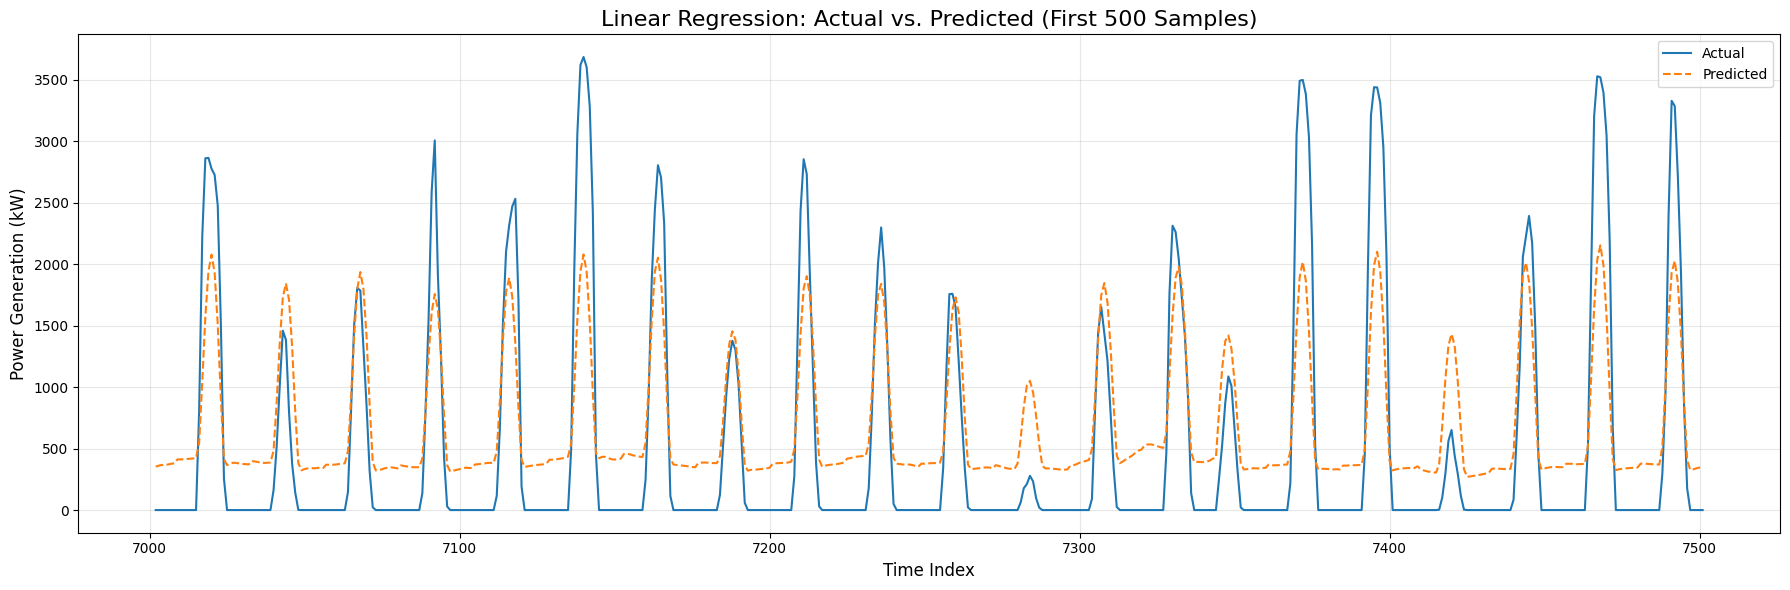

In [7]:
import matplotlib.pyplot as plt

# Create DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}, index=y_test.index)

# Plot first 500 samples with larger figure size
plt.figure(figsize=(18, 6))  
results.head(500).plot(style=['-', '--'], ax=plt.gca()) 
plt.title("Linear Regression: Actual vs. Predicted (First 500 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Power Generation (kW)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

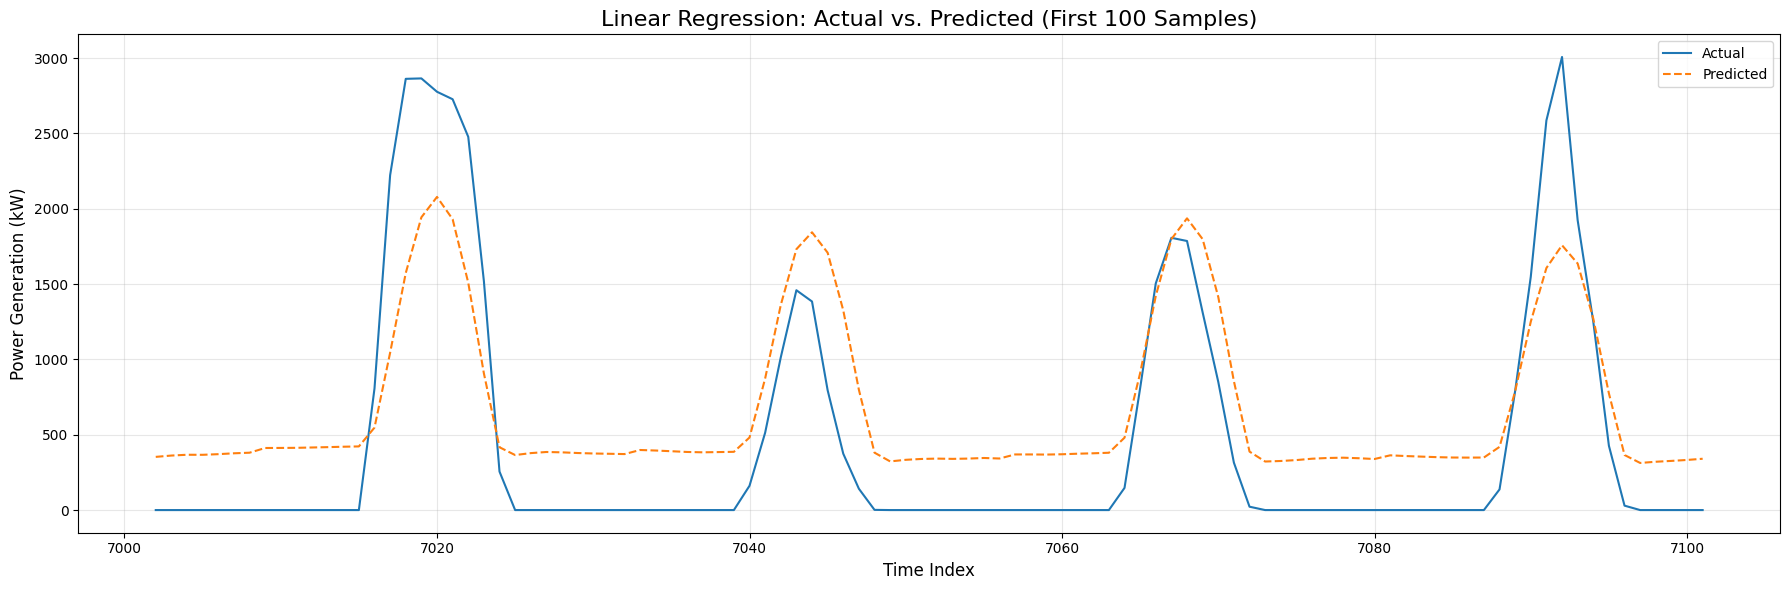

In [8]:
plt.figure(figsize=(18, 6))  
results.head(100).plot(style=['-', '--'], ax=plt.gca()) 
plt.title("Linear Regression: Actual vs. Predicted (First 100 Samples)", fontsize=16)
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Power Generation (kW)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()